## Шаг №1. Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats as st
import math

Откроем каждый датасет в отдельности.

In [2]:
calls = pd.read_csv('calls (1).csv')

calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet = pd.read_csv('internet.csv')

internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
messages = pd.read_csv('messages.csv')

messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
tariffs = pd.read_csv('tariffs.csv')

tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
users = pd.read_csv('users.csv')

users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод: 

Мы ознакомились с разными исходными таблицами. В них явно наблюдаются общие признаки, и это говорит нам о том, что их для удобства необходимо надо будет сделать объединение. Мы определили типы данных, которые заменим в дальшейшем в проекте + приведем дату к одному формату, для выделения из нее месяца пользования услугой. Данные предоставленны качественные, поскольку они без дублей, без пропусков. Единственный вопрос есть к лишнему столбцу в графе интернет.

## Шаг №2. Предобработка данных

Начнем готовить таблицы к объединеню между собой. Поскольку у нас компания Мегалайн округляет любой вызов до целой минуты, то так и сделаем.

In [11]:
calls['duration'] = calls['duration'].apply(np.ceil)

Для получения конкретного месяца пользования тарифом, переведем дату к необходимому формату и возьмем из нее месяц.

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month

In [13]:
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,0.0,1000,8


Что касается вызовов где остались 0. Я считаю, что это никакая не ошибка, а просто недозвоны до пользователя. Думаю, что будет целисообразно оставить эта нули как есть. Ведь если мы попытаемся их заменить средними - это сильно искозит данные, а округлять до ближайшей минуты тоже неправильно. К тому же, пользователям ведь навенка звонят банки, спам реклама и тд.

Сделаем сводную таблицу и начнем ее подготавливать к будущему объединению в общую.

In [14]:
news = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = [len, sum])

news.columns = ('counts_calls','calls_min')
news = news.reset_index()
news.columns = ('user_id', 'month', 'counts_calls','calls_min')

news.head(10)

,user_id,month,counts_calls,calls_min
0,1000,5,22.0,159.0
1,1000,6,43.0,172.0
2,1000,7,47.0,340.0
3,1000,8,52.0,408.0
4,1000,9,58.0,466.0
5,1000,10,57.0,350.0
6,1000,11,43.0,338.0
7,1000,12,46.0,333.0
8,1001,11,59.0,430.0
9,1001,12,63.0,414.0


Мы привели таблицу к удобному для нас виду и теперь посмотрим, что у нас с данными по Интернету.

In [15]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Здесь у нас появился какой-то неизвестный столбец, который явно получен по ошибке. Можем его удалить, однако, поскольку мы из исходной таблицы соберем сводную, то можем его и совсем не трогать.Тут также попытаемся выделить месяц + округлим данные по мегабайтам как требует задача.

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

news_mb = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = [sum])

In [17]:
news_mb

sum
               mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3203 rows x 1 columns]

In [18]:
news_mb.column = ('count_mb')

news_mb = news_mb.reset_index()
news_mb.columns = ('user_id', 'month', 'mb_used')

Мы привели таблицу к удобному для нас виду и теперь посмотрим, что у нас с данными по Сообщениям.

In [19]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month

Здесь немного проще будет сводная, поскольку нам необходимо получить только лишь количество в месяц.

In [21]:
sms = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = [len])

sms

len
              message_date
user_id month             
1000    5               22
        6               60
        7               75
        8               81
        9               57
...                    ...
1498    10              42
1499    9               11
        10              48
        11              59
        12              66

[2717 rows x 1 columns]

In [22]:
sms.column = ('message_count')

sms = sms.reset_index()
sms.columns = ('user_id', 'month', 'message_count')

sms.head(10)

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


После того, как мы привели все три таблицы к единому формату, то начем их объединять.

In [23]:
table = news.merge(news_mb,  how = 'outer')

In [24]:
df_without_people = table.merge(sms, how = 'outer')

In [25]:
df = df_without_people.merge(users, how = 'outer')

df.head(10)

,user_id,month,counts_calls,calls_min,mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10.0,57.0,350.0,14717.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11.0,43.0,338.0,14768.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12.0,46.0,333.0,9827.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11.0,59.0,430.0,18452.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12.0,63.0,414.0,14053.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


Сейчас попытаемся найти и обработать пропуски в данных.

In [26]:
df.isna().sum()

user_id             0
month               2
counts_calls       42
calls_min          42
mb_used            13
message_count     499
age                 0
churn_date       3027
city                0
first_name          0
last_name           0
reg_date            0
tariff              0
dtype: int64

Попробуем найти закономерность в попусках по количеству звонков и количеству минут

In [27]:
df[df['counts_calls'].isnull() == True]

,user_id,month,counts_calls,calls_min,mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff
2329,1373,6.0,NaN,NaN,12457.0,48.0,34,NaN,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart
3039,1476,4.0,NaN,NaN,531.0,NaN,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra
3176,1091,5.0,NaN,NaN,10714.0,30.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
3177,1091,6.0,NaN,NaN,10245.0,30.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
3178,1091,7.0,NaN,NaN,16460.0,35.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
3179,1091,8.0,NaN,NaN,12644.0,31.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
3180,1091,9.0,NaN,NaN,16611.0,32.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
3181,1091,10.0,NaN,NaN,15659.0,44.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
3182,1091,11.0,NaN,NaN,11876.0,28.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
3183,1091,12.0,NaN,NaN,13292.0,42.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra


Как мы видим, большинство пользователей не разговаривавших по телефону пользовались в основном интернетом и СМС-ками. Причем многие люди из месяца в месяц не совершали звонки. Видимо, телефон они использовали как модем. Еще мы нашли двух пользователей, которым подключили тариф в середине декабря 2018 года, и через неделю они отключились и не пользовались услугами.

В целом, можно сделать вывод - пропусков немного и они скорее всего закономерны из-за особенностей пользования сим-картами. Поскольку данных с пропусками мало и они составляют менее 10%, то избавимся от них ради точного результата.

In [28]:
df = df.dropna(subset = ['month', 'counts_calls', 'calls_min', 'mb_used'])

df.isna().sum()

user_id             0
month               0
counts_calls        0
calls_min           0
mb_used             0
message_count     496
age                 0
churn_date       2977
city                0
first_name          0
last_name           0
reg_date            0
tariff              0
dtype: int64

У нас остались только пропуски по количеству смс, которых примерно 20 % от всего Датасета. Просто так удалить их не получится.

Заполнение 0 месяца - автоматически говорит, что данный пользователь был активен в этот месяц

Заполнение 0 данных по звонкам, смс и интернет траффику тоже позволяет заключить, что пользователь использовал данные опции и это может повлиять на расчёты средний показателей

Поскольку у нас люди без СМС всех возрастов, то определенной закономерности здесь нет. Единственное, что сейчас все чаще пользователи пользуются интернетом и он им заменяет отправку СМС. Предположим, что они их просто не отправляли, тем более, в данных есть пользователи у которых по 1 СМС в месяц. Если произвести поиск тех у кого 0, то таких просто нет, а значит, у пользователей пропуски в этом столбце, так как смс они не отправляли.

In [29]:
df['message_count'] = df['message_count'].fillna(0)

У нас остался один столбец с пропусками - churn_date. Поскольку это столбец отключения тарифа, а мы знаем, что кроме двух человек никто не уходил, то эти данные трогать не станем.

А теперь мы готовы к изменению типа данных Датафрейма для удобства дальнейшей работы. Нам необходимо поменять типы данных сразу нескольких столбцов.

In [30]:
df['month'] = df['month'].astype(int)
df['counts_calls'] = df['counts_calls'].astype(int)
df['calls_min'] = df['calls_min'].astype(int)
df['mb_used'] = df['mb_used'].astype(int)
df['message_count'] = df['message_count'].astype(int)


Посмотрим на данные по тарифам и создадим колонки в таблице с расходами пользователей по трем параметрам за все время пользования.

In [31]:
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Тут мы сделаем три разные функции, которые будут считать данные по Минутам, СМС и интернету.

In [32]:
def money_tariff(row):
    if row[12] == 'smart':
        minutes = tariffs['minutes_included'][0] - row[3]
        return(minutes)
    else:
        minutes1 = tariffs['minutes_included'][1] - row[3]
        return(minutes1)
        
df['money_tariff'] = df.apply(money_tariff, axis = 1)

In [33]:
def money_tariff(row):
    if row[12] == 'smart':
        sms = tariffs['messages_included'][0] - row[5]
        return(sms)
    else:
        sms1 = tariffs['messages_included'][1] - row[5]
        return(sms1)
        
df['sms_tariff'] = df.apply(money_tariff, axis = 1)

In [34]:
def money_tariff(row):
    if row[12] == 'smart':
        mb = tariffs['mb_per_month_included'][0] - row[4]
        return(mb)
    else:
        mb1 = tariffs['mb_per_month_included'][1] - row[4]
        return(mb1)
    
df['mb_tariff'] = df.apply(money_tariff, axis = 1)

In [35]:
df.head(30)

,user_id,month,counts_calls,calls_min,mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff,money_tariff,sms_tariff,mb_tariff
0,1000,5,22,159,2256,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2841,978,28464
1,1000,6,43,172,23257,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2828,940,7463
2,1000,7,47,340,14016,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2660,925,16704
3,1000,8,52,408,14070,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2592,919,16650
4,1000,9,58,466,14581,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2534,943,16139
5,1000,10,57,350,14717,73,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2650,927,16003
6,1000,11,43,338,14768,58,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2662,942,15952
7,1000,12,46,333,9827,70,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2667,930,20893
8,1001,11,59,430,18452,0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,70,50,-3092
9,1001,12,63,414,14053,0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,86,50,1307


Теперь поменяем тип данных для Интернета + переведем все для удобства в Гб. Далее, составим функцию для подсчета общей выручки.

Поменяем типы данных перед просчетом функции:

In [36]:
df['mb_tariff'] =  round(df['mb_tariff']/1024, 1) 
df['mb_used'] = round(df['mb_used']/1024, 1)

Чтобы не переписывать всю функцию из-за смены названия mb_tariff, заменим егочерез названия колонок.

In [37]:
df.rename(columns={'mb_tariff': 'gb_tariff', 'mb_used': 'gb_used'}, inplace=True)

In [38]:
def total(row):
    if row[12] == 'smart':
        if row[13] >= 0 and row[14] >=0 and row[15] >= 0:
            result = tariffs['rub_monthly_fee'][0]
            return(result)
        elif row[13] < 0 and row[14] >=0 and row[15] >= 0:
            result = tariffs['rub_monthly_fee'][0] + (abs(row[13])) * tariffs['rub_per_minute'][0]
            return(result)
        elif row[13] >= 0 and row[14] < 0 and row[15] >= 0:
            result = tariffs['rub_monthly_fee'][0] + (abs(row[14])) * tariffs['rub_per_message'][0]
            return(result)
        elif row[13] >= 0 and row[14] >= 0 and row[15] < 0:
            result = tariffs['rub_monthly_fee'][0] + (abs(row[15])) * tariffs['rub_per_gb'][0]
            return(result)
        elif row[13] < 0 and row[14] < 0 and row[15] >= 0:
            result = tariffs['rub_monthly_fee'][0] + (abs(row[13])) * tariffs['rub_per_minute'][0] + (abs(row[14])) * tariffs['rub_per_message'][0]
            return(result)
        elif row[13] < 0 and row[14] >= 0 and row[15] < 0:
            result = tariffs['rub_monthly_fee'][0] + (abs(row[13])) * tariffs['rub_per_minute'][0] +(abs(row[15])) * tariffs['rub_per_gb'][0]
            return(result)
        elif row[13] >= 0 and row[14] < 0 and row[15] < 0:
            result = tariffs['rub_monthly_fee'][0] +(abs(row[15])) * tariffs['rub_per_gb'][0] + (abs(row[14])) * tariffs['rub_per_message'][0]
            return(result)
        elif row[13] < 0 and row[14] < 0 and row[15] < 0:
            result = tariffs['rub_monthly_fee'][0] + (abs(row[13])) * tariffs['rub_per_minute'][0] + (abs(row[14])) * tariffs['rub_per_message'][0] +(abs(row[15])) * tariffs['rub_per_gb'][0]
            return(result)
    else:
        if row[13] >= 0 and row[14] >=0 and row[15] >= 0:
            result = tariffs['rub_monthly_fee'][1]
            return(result)
        elif row[13] < 0 and row[14] >=0 and row[15] >= 0:
            result = tariffs['rub_monthly_fee'][1] + (abs(row[13])) * tariffs['rub_per_minute'][1]
            return(result)
        elif row[13] >= 0 and row[14] < 0 and row[15] >= 0:
            result = tariffs['rub_monthly_fee'][1] + (abs(row[14])) * tariffs['rub_per_message'][1]
            return(result)
        elif row[13] >= 0 and row[14] >= 0 and row[15] < 0:
            result = tariffs['rub_monthly_fee'][1] + (abs(row[15])) * tariffs['rub_per_gb'][1]
            return(result)
        elif row[13] < 0 and row[14] < 0 and row[15] >= 0:
            result = tariffs['rub_monthly_fee'][1] + (abs(row[13])) * tariffs['rub_per_minute'][1] + (abs(row[14])) * tariffs['rub_per_message'][1]
            return(result)
        elif row[13] < 0 and row[14] >= 0 and row[15] < 0:
            result = tariffs['rub_monthly_fee'][1] + (abs(row[13])) * tariffs['rub_per_minute'][1] +(abs(row[15])) * tariffs['rub_per_gb'][1]
            return(result)
        elif row[13] >= 0 and row[14] < 0 and row[15] < 0:
            result = tariffs['rub_monthly_fee'][1] +(abs(row[15])) * tariffs['rub_per_gb'][1] + (abs(row[14])) * tariffs['rub_per_message'][1]
            return(result)
        elif row[13] < 0 and row[14] < 0 and row[15] < 0:
            result = tariffs['rub_monthly_fee'][1] + (abs(row[13])) * tariffs['rub_per_minute'][1] + (abs(row[14])) * tariffs['rub_per_message'][1] +(abs(row[15])) * tariffs['rub_per_gb'][1]
            return(result)
   
        
df['total_money'] = df.apply(total, axis = 1)

In [39]:
df.head(30)

,user_id,month,counts_calls,calls_min,gb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff,money_tariff,sms_tariff,gb_tariff,total_money
0,1000,5,22,159,2.2,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2841,978,27.8,1950.0
1,1000,6,43,172,22.7,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2828,940,7.3,1950.0
2,1000,7,47,340,13.7,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2660,925,16.3,1950.0
3,1000,8,52,408,13.7,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2592,919,16.3,1950.0
4,1000,9,58,466,14.2,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2534,943,15.8,1950.0
5,1000,10,57,350,14.4,73,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2650,927,15.6,1950.0
6,1000,11,43,338,14.4,58,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2662,942,15.6,1950.0
7,1000,12,46,333,9.6,70,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2667,930,20.4,1950.0
8,1001,11,59,430,18.0,0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,70,50,-3.0,1150.0
9,1001,12,63,414,13.7,0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,86,50,1.3,550.0


Не будем округлять выручку чтобы не потерять ее часть

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3163 entries, 0 to 3175
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3163 non-null   int64  
 1   month          3163 non-null   int32  
 2   counts_calls   3163 non-null   int32  
 3   calls_min      3163 non-null   int32  
 4   gb_used        3163 non-null   float64
 5   message_count  3163 non-null   int32  
 6   age            3163 non-null   int64  
 7   churn_date     186 non-null    object 
 8   city           3163 non-null   object 
 9   first_name     3163 non-null   object 
 10  last_name      3163 non-null   object 
 11  reg_date       3163 non-null   object 
 12  tariff         3163 non-null   object 
 13  money_tariff   3163 non-null   int64  
 14  sms_tariff     3163 non-null   int64  
 15  gb_tariff      3163 non-null   float64
 16  total_money    3163 non-null   float64
dtypes: float64(3), int32(4), int64(4), object(6)
memory 

### Вывод:

В результате предобработки данных нам удалось объединить необходимые таблицы, свести все к единому формату и посчитать общее количество выручки. Из того что бросается в глаза - пользователи двух тарифов активно используют интернет, поскольку именно там часще всего был перерасход бесплатного лимита. Данные с 0-ми в звонках оставили как есть, поскольку считаю логичным, что это просто недозвоны пользователей и даже если у вас пропущенный, то глупо за это брать деньги. Тем более, на дворе 21 век и все платные недозвоны остались в прошлом.

## Шаг №3. Исследователский анализ данных

Проанализируем клиентов отдельно по минутам разговора, числу смс и количеству траффика тарифа Смарт и по тарифу Ультра.

[Text(0, 0.5, 'Плотность частоты'), Text(0.5, 0, 'Значения количества минут')]

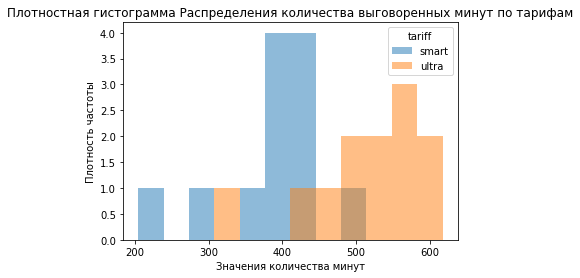

In [41]:
df.pivot_table(index= 'tariff',columns = 'month',values= 'calls_min',aggfunc=['mean']).T.plot(bins = 12, kind='hist', alpha=0.5, title='Плотностная гистограмма Распределения количества выговоренных минут по тарифам').set(xlabel="Значения количества минут", ylabel="Плотность частоты")

[Text(0, 0.5, 'Плотность частоты'), Text(0.5, 0, 'Значения количества СМС')]

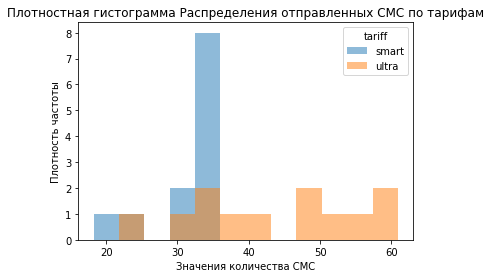

In [42]:
df.pivot_table(index= 'tariff',columns = 'month',values= 'message_count',aggfunc=['mean']).T.plot(bins = 12, kind='hist', alpha=0.5, title='Плотностная гистограмма Распределения отправленных СМС по тарифам').set(xlabel="Значения количества СМС", ylabel="Плотность частоты")

[Text(0, 0.5, 'Плотность частоты'),
 Text(0.5, 0, 'Значения количества Гигабайт')]

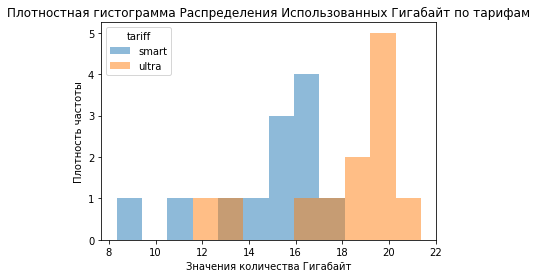

In [43]:
df.pivot_table(index= 'tariff',columns = 'month',values= 'gb_used',aggfunc=['mean']).T.plot(bins = 12, kind='hist', alpha=0.5, title='Плотностная гистограмма Распределения Использованных Гигабайт по тарифам').set(xlabel="Значения количества Гигабайт", ylabel="Плотность частоты")

Разберем каждую гистограмму плотности отдельно: 

1) Пользователи тарифа Смарт в основном выговаривают весь лимит на месяц. Есть предположение,что риск вылезти за пределы лимита высок, а значит, можно дополнительно заработать средств для компании Мегалайн. Если рассматривать тариф Ультра, то здесь пользователи имеют достаточно широкий разброс значений. Однако, при достаточно большом бесплатном лимите, пользователи не пользуются им сполна. Получается, что по тарифу Ультра возможности подзаработать дополнительно почти нет. 

2) По СМС ситуация аналогичная. Пользователи тарифа Смарт пользуются СМС почти на пределе, а вот в тарифе Ультра наоборот, даже половина потенциала не расходуется. Получается, что пользователям не требуется столько СМС и Минут.

3) Есть интересное наблюдение - в двух тарифах активно пользуются интернетом. Пользователи Тарифа смарт часто выходят за пределы лимита, а значит Мегалайн зарабатывает дополнительно. Интернет в тарифе Ультра самое используемое средство коммуникации, по сравнению с СМС и Звонками.

### Вывод:

В результате предобработки данных нам удалось объединить необходимые таблицы, свести все к единому формату и посчитать общее количество выручки. Из того что бросается в глаза - пользователи двух тарифов активно используют интернет, поскольку именно там часще всего был перерасход бесплатного лимита. Данные с 0-ми в звонках оставили как есть, поскольку считаю логичным, что это просто недозвоны пользователей и даже если у вас пропущенный, то глупо за это брать деньги. Тем более, на дворе 21 век и все платные недозвоны остались в прошлом.

Разведем тарифы отдельно

In [44]:
smart = df.query('tariff == "smart"')
ultra = df.query('tariff == "ultra"')

Посчитаем среднее по Минутам разговора, СМС и расходу интернета для тарифа Smart

In [45]:
mean_calls_smart = round(smart['calls_min'].mean())
mean_mess_smart = round(smart['message_count'].mean())
mean_gb_smart = round(smart['gb_used'].mean())
print('Среднее количество минут разговора:', mean_calls_smart,)
print('Среднее количество СМС:', mean_mess_smart)
print('Среднее количество GB интернета:', mean_gb_smart)

Среднее количество минут разговора: 419
Среднее количество СМС: 33
Среднее количество GB интернета: 16


Посчитаем дисперсию по Минутам разговора, СМС и расходу интернета для тарифа Smart:

In [46]:
variance_calls_smart = round(np.var(smart['calls_min']))
variance_sms_smart = round(np.var(smart['message_count']))
variance_gb_smart = round(np.var(smart['gb_used']))
print('Дисперсия количества минут разговора:', variance_calls_smart)
print('Дисперсия количества СМС:', variance_sms_smart)
print('Дисперсия количества GB:',variance_gb_smart)

Дисперсия количества минут разговора: 35783
Дисперсия количества СМС: 798
Дисперсия количества GB: 33


Посчитаем Стандартное отклонение по Минутам разговора, СМС и расходу интернета для тарифа Smart:

In [47]:
std_min_smart = np.std(smart['calls_min'])
std_sms_smart= np.std(smart['message_count'])
std_gb_smart = np.std(smart['gb_used'])
print('Стандартное отклонение количества минут разговора:',std_min_smart)
print('Стандартное отклонение количества СМС:',std_sms_smart)
print('Стандартное отклонение количества GB:',std_gb_smart)

Стандартное отклонение количества минут разговора: 189.1635865252543
Стандартное отклонение количества СМС: 28.25107516043966
Стандартное отклонение количества GB: 5.735549605224378


Посчитаем среднее по Минутам разговора, СМС и расходу интернета для тарифа Ultra:

In [48]:
mean_calls_ultra = round(ultra['calls_min'].mean())
mean_mess_ultra = round(ultra['message_count'].mean())
mean_gb_ultra = round(ultra['gb_used'].mean())
print('Среднее количество минут разговора:', mean_calls_ultra,)
print('Среднее количество СМС:', mean_mess_ultra)
print('Среднее количество GB интернета:', mean_gb_ultra)

Среднее количество минут разговора: 549
Среднее количество СМС: 49
Среднее количество GB интернета: 19


Посчитаем дисперсию по Минутам разговора, СМС и расходу интернета для тарифа Ultra:

In [49]:
variance_calls_ultra = round(np.var(ultra['calls_min']))
variance_sms_ultra = round(np.var(ultra['message_count']))
variance_gb_ultra = round(np.var(ultra['gb_used']))
print('Дисперсия количества минут разговора:', variance_calls_ultra)
print('Дисперсия количества СМС:', variance_sms_ultra)
print('Дисперсия количества GB:',variance_gb_ultra)

Дисперсия количества минут разговора: 93916
Дисперсия количества СМС: 2213
Дисперсия количества GB: 95


Посчитаем Стандартное отклонение по Минутам разговора, СМС и расходу интернета для тарифа Ultra:

In [50]:
std_min_ultra = np.std(ultra['calls_min'])
std_sms_ultra = np.std(ultra['message_count'])
std_gb_ultra = np.std(ultra['gb_used'])
print('Стандартное отклонение количества минут разговора:',std_min_ultra)
print('Стандартное отклонение количества СМС:',std_sms_ultra)
print('Стандартное отклонение количества GB:',std_gb_ultra)

Стандартное отклонение количества минут разговора: 306.45638717959616
Стандартное отклонение количества СМС: 47.041158312985594
Стандартное отклонение количества GB: 9.747250480805828


In [51]:
print('Доход с тарифа Smart:',smart['total_money'].sum())
print('Доход с тарифа Ultra:',ultra['total_money'].sum())

Доход с тарифа Smart: 2743061.0
Доход с тарифа Ultra: 1940925.0


### Вывод:
Как мне кажется, имеет смысл больше рекламировать и продвигать тариф Смарт. Во-первых, общая выручка у него, даже несмотря на цены, значительно больше. Во-вторых, из-за небольших лимитов клиенты чаще всего ходят на грани. А это может привести к тому, что в лимит они не укладываются и Мегалайн заработает дополнительные средства. 

## Шаг №4. Проверка гипотез

Подготовим переменные к проверке гипотез по выручке тарифов

In [52]:
money_smart = smart['total_money']
money_ultra = ultra['total_money']

Сформируем гипотезы для проверки различия выручки пользователей тарифов «Ультра» и «Смарт» при помощи метода st.ttest_ind():  - поскольку выборки у нас будут приниматься разные. Значение "equal_var = False, так как дисперсия по генеральным совокупностям разная.
#### Нулевая гипотеза - Выручки не различаются.
#### Альтернативная гипотеза - Выручки различаются. 

In [53]:
alpha = .05

results = st.ttest_ind(
    money_smart, 
    money_ultra, equal_var = False)

print('p-значение по тарифам: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу по тарифам")
else:
    print("Не получилось отвергнуть нулевую гипотезу по тарифам")

p-значение по тарифам:  8.672031215258666e-289
Отвергаем нулевую гипотезу по тарифам


### Вывод
Итоговое значение p-value говорит о том, что средняя выручка пользователей тарифов Ультра и Смарт сильно различается друг от друга. Это значительно выше заданной статистической значимости. Можем сделать вывод, что нулевую гипотезу необходимо отвергнуть. 

Подготовим данные для проверки гипотезы по Москве и Регионам

In [54]:
moscow = df.query('city == "Москва"')
other_russia = df.query('city != "Москва"')

moscow_money = moscow['total_money']
other_russia_money = other_russia['total_money']

Сформируем гипотезы для проверки отличия выручки пользователей из Москвы от других Регионов
st.ttest_ind():  - поскольку выборки у нас будут приниматься разные. "equal_var = True, так как дисперсия по генеральным совокупностям примерно одинаковая


#### Нулевая гипотеза - Выручки не отличаются.
#### Альтернативная гипотеза - Выручки отлличаются. 

In [55]:
alpha = .05

results = st.ttest_ind(
    moscow_money, 
    other_russia_money)

print('p-значение по городам: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу по городам")
else:
    print("Не получилось отвергнуть нулевую гипотезу по городам")

p-значение по городам:  0.3739451227034162
Не получилось отвергнуть нулевую гипотезу по городам


### Вывод
Итоговое значение p-value говорит о том, что особой разницы в географическом влиянии нет. Вводить какие-то особые региональные условия не имеет смысла. Средняя выручка пользователей из Москвы не отличается от регионов.

## Шаг №5. Итоговый вывод:

В результате анализа мы пришли к выводу, что лучшим вариантом для компании Мегалайн является тариф Смарт. Почти все доступные лимиты используются им по полной и есть высокий риск заработать дополнительно на перерасходе. Я бы для пользователей продвигал именно этот тариф. Он доступнее, и с маркетинговой точки зрения продвигать его правильнее. Тариф Ультра я бы советовал оставить и предлагать больше тем, кто прям очень много cидит в интернете. Возможно, на месте компании Мегалайн я бы предложил увеличить лимит по Интернету, но урезать по СМС и Бесплатным минутам, так как их даже на расходуют на 50 %. 

Общая выручка Смарта превышает Ультра примерно на 700 тысяч - а это достаточно существенные цифры. Средняя выручка по Москве и Регионам не отличается и это означает, что какие-то региональные условия вводить не стоит.

Вернее, я бы сказал так - в массовый сегмент необходимо продвигать СМАРТ, а УЛЬТРУ можем точечно давать тем, кто использует пакет ради интернета и боится нехватки лимитов.
